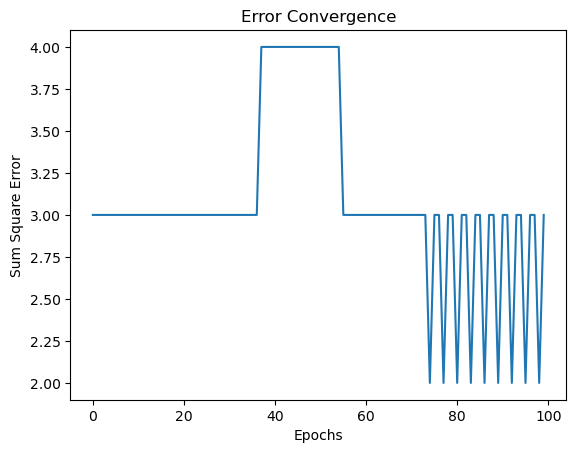

In [1]:
import numpy as np
import matplotlib.pyplot as plt
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
def step_activation(x):
    return 1 if x >= 0 else 0
epochs = 100
errors = []

for epoch in range(epochs):
    sum_square_error = 0
    
    for i in range(len(X)):
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
        predicted_output = step_activation(weighted_sum)
        error = y[i] - predicted_output
        sum_square_error += error ** 2
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]
    
    errors.append(sum_square_error)
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error Convergence')
plt.show()

In [5]:
#bipolar
import numpy as np
def bipolar_step(x):
    return np.where(x <= 0, -1, 1)
def train_perceptron_bipolar_step(X, y, learning_rate, max_iterations):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = np.zeros(num_features)
    bias = 0
    for iteration in range(max_iterations):
        misclassified = 0
        
        for i in range(num_samples):
            activation = np.dot(X[i], weights) + bias
            output = bipolar_step(activation)
            if output != y[i]:
                misclassified += 1
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]
        if misclassified == 0:
            print("Converged in", iteration+1, "iterations")
            break
    
    return weights, bias

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def train_perceptron_sigmoid(X, y, learning_rate, max_iterations):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = np.zeros(num_features)
    bias = 0
    for iteration in range(max_iterations):
        misclassified = 0
        
        for i in range(num_samples):
            activation = np.dot(X[i], weights) + bias
            output = sigmoid(activation)
            if output >= 0.5:
                output = 1
            else:
                output = -1
            
            if output != y[i]:
                misclassified += 1
                weights += learning_rate * (y[i] - output) * X[i]
                bias += learning_rate * (y[i] - output)
        if misclassified == 0:
            print("Converged in", iteration+1, "iterations")
            break
    
    return weights, bias

In [9]:
def relu(x):
    return np.maximum(0, x)
def train_perceptron_relu(X, y, learning_rate, max_iterations):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = np.zeros(num_features)
    bias = 0
    for iteration in range(max_iterations):
        misclassified = 0
        
        for i in range(num_samples):
            activation = np.dot(X[i], weights) + bias
            output = relu(activation)
            if output >= 0:
                output = 1
            else:
                output = -1
            
            if output != y[i]:
                misclassified += 1
                weights += learning_rate * (y[i] - output) * X[i]
                bias += learning_rate * (y[i] - output)
        if misclassified == 0:
            print("Converged in", iteration+1, "iterations")
            break
    
    return weights, bias

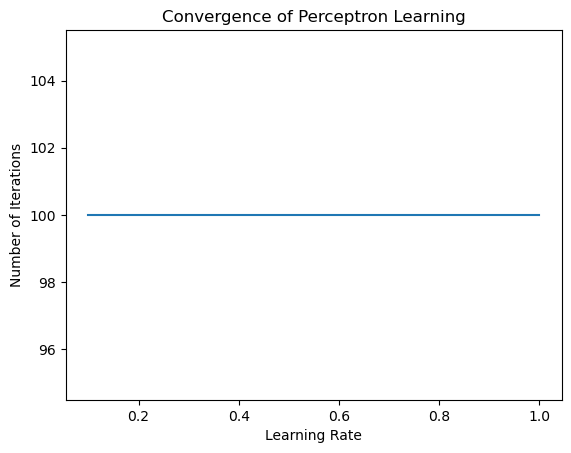

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def step(x):
    return np.where(x <= 0, 0, 1)
def train_perceptron(X, y, learning_rate, max_iterations, initial_weights):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = initial_weights
    bias = 0
    for iteration in range(max_iterations):
        misclassified = 0
        
        for i in range(num_samples):
            activation = np.dot(X[i], weights) + bias
            output = step(activation)
            if output != y[i]:
                misclassified += 1
                weights += learning_rate * (y[i] - output) * X[i]
                bias += learning_rate * (y[i] - output)
        if misclassified == 0:
            return iteration+1
    
    return max_iterations
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

initial_weights = np.zeros(2)
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []
for learning_rate in learning_rates:
    iterations.append(train_perceptron(X, y, learning_rate, 100, initial_weights))
plt.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Convergence of Perceptron Learning')
plt.show()

In [13]:
import numpy as np
def step(x):
    return np.where(x <= 0, 0, 1)
def train_perceptron(X, y, learning_rate, max_iterations):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = np.zeros(num_features)
    bias = 0
    for iteration in range(max_iterations):
        misclassified = 0
        
        for i in range(num_samples):
            activation = np.dot(X[i], weights) + bias
            output = step(activation)
            if output != y[i]:
                misclassified += 1
                weights += learning_rate * (y[i] - output) * X[i]
                bias += learning_rate * (y[i] - output)
        if misclassified == 0:
            print("Converged in", iteration+1, "iterations")
            break
    
    return weights, bias
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
learning_rate = 0.1
max_iterations = 100
weights, bias = train_perceptron(X, y, learning_rate, max_iterations)
print("Weights:", weights)
print("Bias:", bias)

Weights: [-0.1  0. ]
Bias: 0.1


In [15]:
def predict(X, weights, bias):
    activation = np.dot(X, weights) + bias
    output = step(activation)
    return output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = predict(X, weights, bias)
print("Predictions:", predictions)

Predictions: [1 1 0 0]


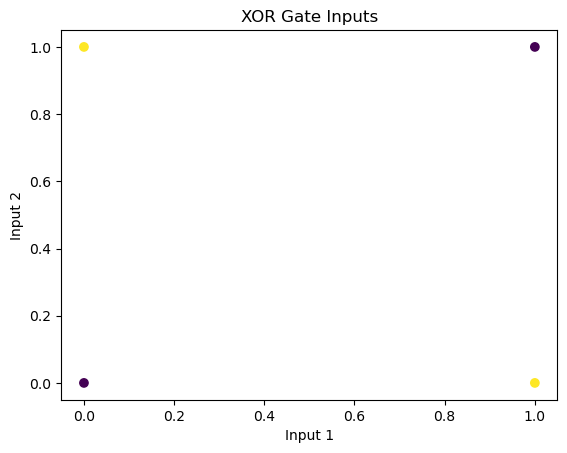

In [17]:
import matplotlib.pyplot as plt
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Gate Inputs')
plt.show()

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def train_perceptron(X, y, learning_rate, max_iterations):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = np.zeros(num_features)
    bias = 0
    
    for iteration in range(max_iterations):
        misclassified = 0
        
        for i in range(num_samples):
            activation = np.dot(X[i], weights) + bias
            output = sigmoid(activation)
            if output >= 0.5:
                output = 1
            else:
                output = 0
            
            if output != y[i]:
                misclassified += 1
                weights += learning_rate * (y[i] - output) * X[i]
                bias += learning_rate * (y[i] - output)
        if misclassified == 0:
            print("Converged in", iteration+1, "iterations")
            break
    
    return weights, bias
X = np.array([[12, 6, 2],
              [16, 8, 3],
              [27, 9, 4],
              [19, 11, 1],
              [24, 22, 2],
              [15, 16, 7],
              [22, 15, 4],
              [24, 18, 4],
              [21, 14, 8],
              [41, 19, 8]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
learning_rate = 0.1
max_iterations = 100
weights, bias = train_perceptron(X, y, learning_rate, max_iterations)
print("Weights:", weights)
print("Bias:", bias)
new_X = np.array([[30, 10, 3],
                  [18, 7, 2],
                  [25, 12, 5]])
predictions = sigmoid(np.dot(new_X, weights) + bias)
print("Predictions:", predictions)

Weights: [  0.9   2.  -12.2]
Bias: 6.299999999999994
Predictions: [9.99999944e-01 9.99994441e-01 2.74578156e-04]


In [21]:
X = np.array([[12, 6, 2],
              [16, 8, 3],
              [27, 9, 4],
              [19, 11, 1],
              [24, 22, 2],
              [15, 16, 7],
              [22, 15, 4],
              [24, 18, 4],
              [21, 14, 8],
              [41, 19, 8]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
X_pseudo_inverse = np.linalg.pinv(X)
weights = np.dot(X_pseudo_inverse, y)
bias = 0
print("Weights (Pseudo-inverse):", weights)
print("Bias (Pseudo-inverse):", bias)
learning_rate = 0.1
max_iterations = 100
perceptron_weights, perceptron_bias = train_perceptron(X, y, learning_rate, max_iterations)
print("Weights (Perceptron):", perceptron_weights)
print("Bias (Perceptron):", perceptron_bias)

Weights (Pseudo-inverse): [ 0.02634802  0.02791857 -0.10666439]
Bias (Pseudo-inverse): 0
Weights (Perceptron): [  0.9   2.  -12.2]
Bias (Perceptron): 6.299999999999994


In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
class NeuralNetwork:
    def __init__(self, input_size):
        self.input_size = input_size
        self.hidden_size = 4
        self.output_size = 1
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))
    
    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2) + self.bias2)
        return self.output_layer
    
    def backward(self, X, y, output):
        error = y - output
        delta_output = error * sigmoid_derivative(output)
        
        error_hidden = delta_output.dot(self.weights2.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.hidden_layer)
        self.weights2 += self.hidden_layer.T.dot(delta_output)
        self.weights1 += X.T.dot(delta_hidden)
        self.bias2 += np.sum(delta_output, axis=0)
        self.bias1 += np.sum(delta_hidden, axis=0)
    
    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
    
    def predict(self, X):
        output = self.forward(X)
        return np.round

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
class NeuralNetwork:
    def __init__(self):
        self.learning_rate = 0.05
        self.weights = np.random.rand(3)
        
    def feedforward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        output = sigmoid(weighted_sum)
        
        return output
    
    def train(self, inputs, target):
        output = self.feedforward(inputs)
        error = target - output
        gradient = error * sigmoid_derivative(output)
        self.weights[1:] += self.learning_rate * gradient * inputs
        self.weights[0] += self.learning_rate * gradient

network = NeuralNetwork()
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

for _ in range(1000):
    for input_data, target in zip(inputs, targets):
        network.train(input_data, target)

In [81]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
class NeuralNetwork:
    def __init__(self):
        self.learning_rate = 0.05
        self.weights = np.random.rand(3, 2)
        
    def feedforward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:, :]) + self.weights[0, :]
        output = sigmoid(weighted_sum)
        
        return output
    
    def train(self, inputs, target):
        output = self.feedforward(inputs)
        error = target - output
        gradient = error * sigmoid_derivative(output)
        self.weights[1:, :] += self.learning_rate * np.outer(inputs, gradient)
        self.weights[0, :] += self.learning_rate * gradient
network = NeuralNetwork()
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])
for _ in range(1000):
    for input_data, target in zip(inputs, targets):
        network.train(input_data, target)
network = NeuralNetwork()
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])
for _ in range(1000):
    for input_data, target in zip(inputs, targets):
        network.train(input_data, target)

In [83]:
from sklearn.neural_network import MLPClassifier
import numpy as np
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([0, 0, 0, 1])
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
and_classifier.fit(and_inputs, and_targets)
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_targets = np.array([0, 1, 1, 0])
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
xor_classifier.fit(xor_inputs, xor_targets)

and_test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_predictions = and_classifier.predict(and_test_inputs)
print("AND Gate Predictions:", and_predictions)


xor_test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_predictions = xor_classifier.predict(xor_test_inputs)
print("XOR Gate Predictions:", xor_predictions)

AND Gate Predictions: [0 0 0 1]
XOR Gate Predictions: [0 0 0 0]


In [85]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('tips.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
